In [1]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from  scipy.stats import skew, kurtosis, shapiro
from statistics import mean
from math import sqrt
from sklearn.metrics import r2_score
from matplotlib.pyplot import figure
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
import datetime as dt
from sklearn.metrics import r2_score

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Input & Pre-processing

In [2]:
stock_name = 'ea.bk'

In [3]:
# Load Data
ea = data.DataReader(stock_name, data_source='yahoo', start='2012-01-01', end='2021-03-05')
print(ea)

             High    Low   Open  Close        Volume  Adj Close
Date                                                           
2013-01-30   8.05   5.90   5.95   7.60  2.026074e+09   7.307534
2013-01-31   8.30   7.60   8.20   7.60  5.976745e+08   7.307534
2013-02-01   7.95   7.35   7.70   7.40  2.669156e+08   7.115231
2013-02-04   7.70   7.40   7.50   7.55  1.695438e+08   7.259459
2013-02-05   7.55   7.15   7.40   7.25  1.194262e+08   6.971003
...           ...    ...    ...    ...           ...        ...
2021-03-01  63.25  61.00  61.50  62.50  1.403220e+07  62.186192
2021-03-02  63.50  62.50  63.25  62.75  1.400840e+07  62.434937
2021-03-03  65.00  63.00  63.00  65.00  1.850150e+07  64.673637
2021-03-04  65.25  63.25  64.50  63.25  2.187600e+07  62.932426
2021-03-05  64.00  62.50  63.00  63.25  1.526550e+07  62.932426

[1975 rows x 6 columns]


In [4]:
# Data Cleaning
ea_drop = ea.copy().drop(columns=['High','Low','Close','Open','Volume'])
ea_clean = ea_drop
print(ea_clean)

            Adj Close
Date                 
2013-01-30   7.307534
2013-01-31   7.307534
2013-02-01   7.115231
2013-02-04   7.259459
2013-02-05   6.971003
...               ...
2021-03-01  62.186192
2021-03-02  62.434937
2021-03-03  64.673637
2021-03-04  62.932426
2021-03-05  62.932426

[1975 rows x 1 columns]


In [5]:
# Check for NA
print('Number of NA: ',ea_clean.isnull().sum().sum())

Number of NA:  0


In [6]:
ea_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1975 entries, 2013-01-30 to 2021-03-05
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1975 non-null   float64
dtypes: float64(1)
memory usage: 30.9 KB


# Data Visualisation

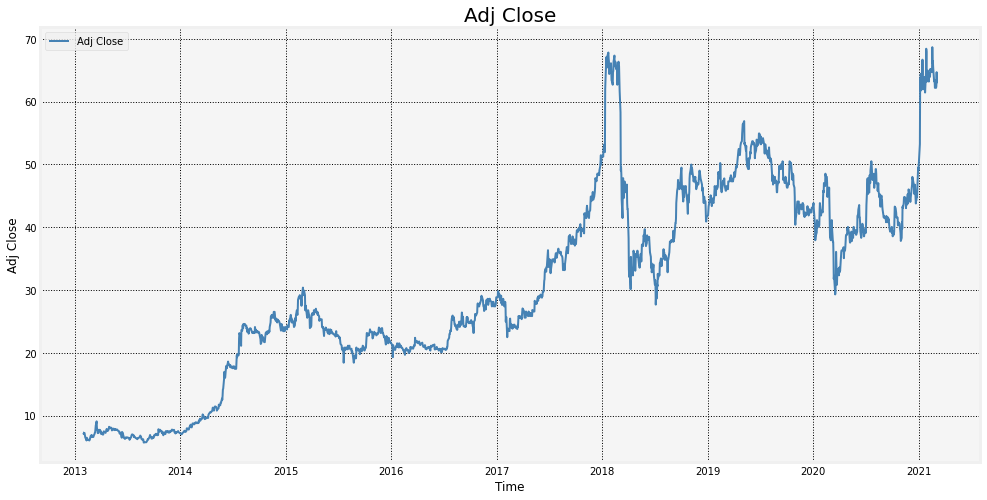

In [7]:
# Plot Data
plt.style.use('fivethirtyeight')
%matplotlib inline

plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.figsize'] = (15.0, 8) # set the size of figure
plt.subplot(facecolor = "whitesmoke") # set the background color
plt.plot(ea_clean['Adj Close'],label = 'Adj Close',color="steelblue", linestyle="-", linewidth=2.0) # plot with set the line width,shape and color
plt.legend()

plt.xlabel("Time")
plt.ylabel("Adj Close")
plt.title("Adj Close", fontsize = 20)
plt.grid(color="k", linestyle=":") # set grid and line shape

# plt.savefig('Daily cases.png')
plt.show()

            Adj Close
Date                 
2013-01-30        NaN
2013-01-31        NaN
2013-02-01        NaN
2013-02-04        NaN
2013-02-05        NaN
...               ...
2021-03-01  64.341980
2021-03-02  64.358563
2021-03-03  64.383438
2021-03-04  64.366855
2021-03-05  64.383438

[1975 rows x 1 columns]


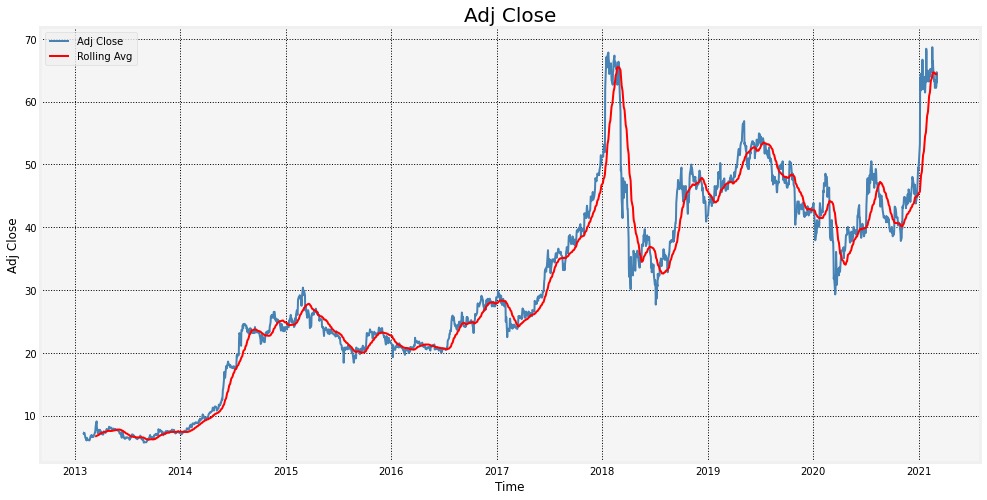

In [8]:
# Rolling Average
ea_roll = ea_clean.rolling(window=30).mean()
print(ea_roll)

# Plot Data
plt.style.use('fivethirtyeight')
%matplotlib inline

plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.figsize'] = (15.0, 8) # set the size of figure
plt.subplot(facecolor = "whitesmoke") # set the background color
plt.plot(ea_clean['Adj Close'],label = 'Adj Close',color="steelblue", linestyle="-", linewidth=2.0) # plot with set the line width,shape and color
plt.plot(ea_roll['Adj Close'], label = 'Rolling Avg', color="Red", linewidth=2.0)
plt.legend()

plt.xlabel("Time")
plt.ylabel("Adj Close")
plt.title("Adj Close", fontsize = 20)
plt.grid(color="k", linestyle=":") # set grid and line shape

# plt.savefig('Daily cases.png')
plt.show()

# Exploration Data Analysis (EDA)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


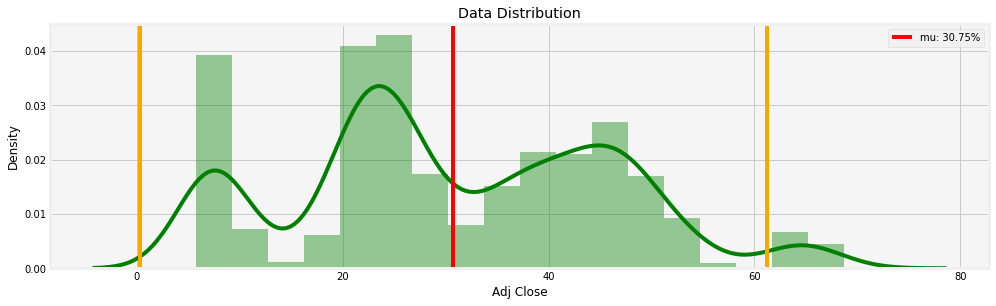

In [9]:
# Plot Distribution

plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.figsize'] = (15.0, 4.5) # set the size of figure
plt.subplot(facecolor = "whitesmoke") # set the background color

sns.distplot(ea_clean['Adj Close'],color='g')

plt.title("Data Distribution")
plt.xlabel("Adj Close")

mean = np.mean(ea_clean['Adj Close'])
std = np.std(ea_clean['Adj Close'])
plt.axvline(x=mean, color='r', linestyle='-', label="mu: {0:.2f}%".format(mean))
plt.axvline(x=mean+2*std, color='orange', linestyle='-')
plt.axvline(x=mean-2*std, color='orange', linestyle='-')
# plt.grid(color="k", linestyle=":") # set grid and line shape
plt.legend()
plt.show()

In [10]:
# Kurt and Skew
skew = skew(ea_clean['Adj Close'])
kurt = kurtosis(ea_clean['Adj Close'])
print("Skewness: {} \nKurtosis: {}".format(skew, kurt))

Skewness: 0.17773201546925382 
Kurtosis: -0.6721900559706975


Skewness is the measure of asymmetry in the distribution. This value can be positive or negative.

Kurtosis is a measurement that describe the shape of a distribution compare to normal distribution.

The data has a positive skew distribution(tail on the right, extending toward positive value). Negative kurtosis indicates that the data is flat and has thin tails compare to normal distribution.

In [11]:
ea_clean.index = pd.to_datetime(ea_clean.index)
ea_clean.index

DatetimeIndex(['2013-01-30', '2013-01-31', '2013-02-01', '2013-02-04',
               '2013-02-05', '2013-02-06', '2013-02-07', '2013-02-08',
               '2013-02-11', '2013-02-12',
               ...
               '2021-02-19', '2021-02-22', '2021-02-23', '2021-02-24',
               '2021-02-25', '2021-03-01', '2021-03-02', '2021-03-03',
               '2021-03-04', '2021-03-05'],
              dtype='datetime64[ns]', name='Date', length=1975, freq=None)

Text(0, 0.5, 'seasonal')

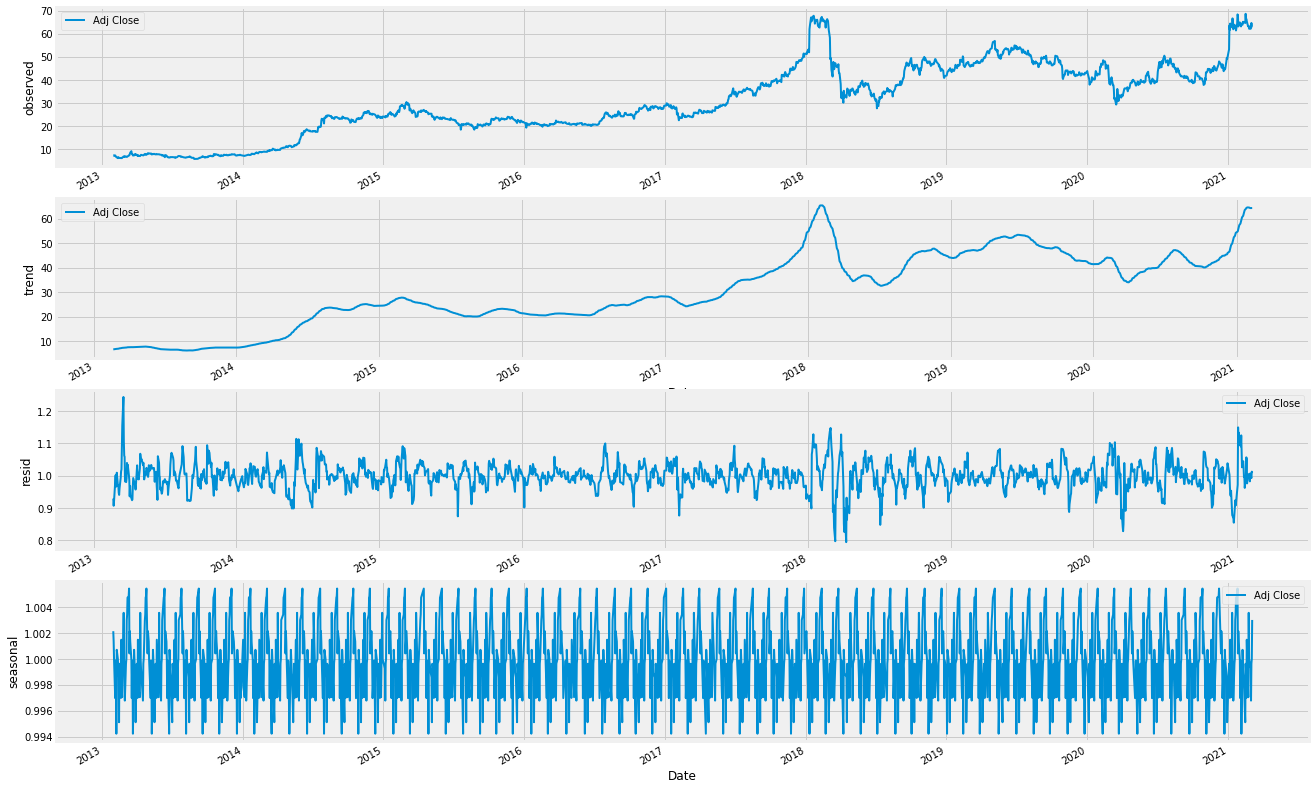

In [12]:
# Data decomposition

res = seasonal_decompose(ea_clean, model='multiplicative',freq=30)
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(20,15))
res.observed.plot(ax=ax1,linewidth=2)
ax1.set_ylabel('observed')
res.trend.plot(ax=ax2,linewidth=2)
ax2.set_ylabel('trend')
res.resid.plot(ax=ax3,linewidth=2)
ax3.set_ylabel('resid')
res.seasonal.plot(ax=ax4,linewidth=2)
ax4.set_ylabel('seasonal')

# Split data

In [13]:
# Normalization
norm = MinMaxScaler(feature_range = (0,1))
ea_norm = norm.fit_transform(ea_clean)

In [14]:
# 60 train and 1 output
x_train = []
y_train = []
for i in range(60,len(ea_norm)):
  x_train.append(ea_norm[i-60:i,0])
  y_train.append(ea_norm[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# Neural Network (LSTM)

In [15]:
# Parameter
drop = 0.2 # dropout
epochs = 500
batch_size=32

In [16]:
# Initialising LSTM
model = Sequential()

# First layer(input)
model.add(LSTM(units=50, return_sequences=True, input_shape = (x_train.shape[1],1))) # return_sequences=True because we are using LSTM
model.add(Dropout(drop))

# Second layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(drop))

# Third layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(drop))

# Fourth layer
model.add(LSTM(units=50))
model.add(Dropout(drop))

# Output layer
model.add(Dense(units=1))

# Optimizer
model.compile(optimizer='adam', loss='mean_squared_error')

# Fitting
model.fit(x_train,y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/500
60/60 [==============================] - 38s 59ms/step - loss: 0.0370
Epoch 2/500
60/60 [==============================] - 4s 59ms/step - loss: 0.0055
Epoch 3/500
60/60 [==============================] - 4s 59ms/step - loss: 0.0043
Epoch 4/500
60/60 [==============================] - 4s 59ms/step - loss: 0.0048
Epoch 5/500
60/60 [==============================] - 4s 59ms/step - loss: 0.0050
Epoch 6/500
60/60 [==============================] - 4s 59ms/step - loss: 0.0038
Epoch 7/500
60/60 [==============================] - 4s 58ms/step - loss: 0.0041
Epoch 8/500
60/60 [==============================] - 4s 58ms/step - loss: 0.0041
Epoch 9/500
60/60 [==============================] - 4s 59ms/step - loss: 0.0034
Epoch 10/500
60/60 [==============================] - 4s 59ms/step - loss: 0.0029
Epoch 11/500
60/60 [==============================] - 4s 59ms/step - loss: 0.0036
Epoch 12/500
60/60 [==============================] - 4s 59ms/step - loss: 0.0026
Epoch 13/500
60/60 [====

# Prediction on validation set

In [36]:
# Load test
validation_start = dt.datetime(2021,3,6)
validation_end = dt.datetime.now()
ea_test = data.DataReader(stock_name, data_source='yahoo', start=validation_start, end=validation_end)

In [37]:
# Data Cleaning
ea_test_drop = ea_test.copy().drop(columns=['High','Low','Close','Open','Volume'])
ea_test_clean = ea_test_drop
ea_test_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22 entries, 2021-03-08 to 2021-04-07
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  22 non-null     float64
dtypes: float64(1)
memory usage: 352.0 bytes


In [38]:
ea_total = pd.concat((ea_clean,ea_test_clean),axis=0)
inputs = ea_total[len(ea_total)-len(ea_test)-60:].values # inputs start 60 days before validation set start
inputs = inputs.reshape(-1,1)
inputs = norm.fit_transform(inputs)
x_test = []
for i in range(60,60+len(ea_test_clean)):
  x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

# Make prediction
prediction = model.predict(x_test)

# Inverse normalization
prediction = norm.inverse_transform(prediction)

prediction = pd.DataFrame(prediction)
prediction.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       22 non-null     float32
dtypes: float32(1)
memory usage: 216.0 bytes


In [39]:
# Compare Table
result = ea_test_clean.copy()
result['prediction'] = prediction.values
print(result)

            Adj Close  prediction
Date                             
2021-03-08  59.450001   63.455173
2021-03-09  58.206276   60.805008
2021-03-10  59.450001   59.107113
2021-03-11  59.450001   59.893200
2021-03-12  59.500000   59.531105
2021-03-15  58.750000   59.685406
2021-03-16  60.250000   59.170956
2021-03-17  59.750000   60.328560
2021-03-18  59.500000   59.786770
2021-03-19  59.500000   59.120777
2021-03-22  58.750000   59.224792
2021-03-23  58.250000   58.351990
2021-03-24  58.750000   57.900673
2021-03-25  61.250000   58.465317
2021-03-26  60.750000   60.940651
2021-03-29  60.500000   61.115543
2021-03-30  59.750000   60.263115
2021-03-31  62.000000   59.770992
2021-04-01  62.750000   61.956360
2021-04-02  61.750000   62.977268
2021-04-05  60.500000   61.987728
2021-04-07  59.750000   60.639736


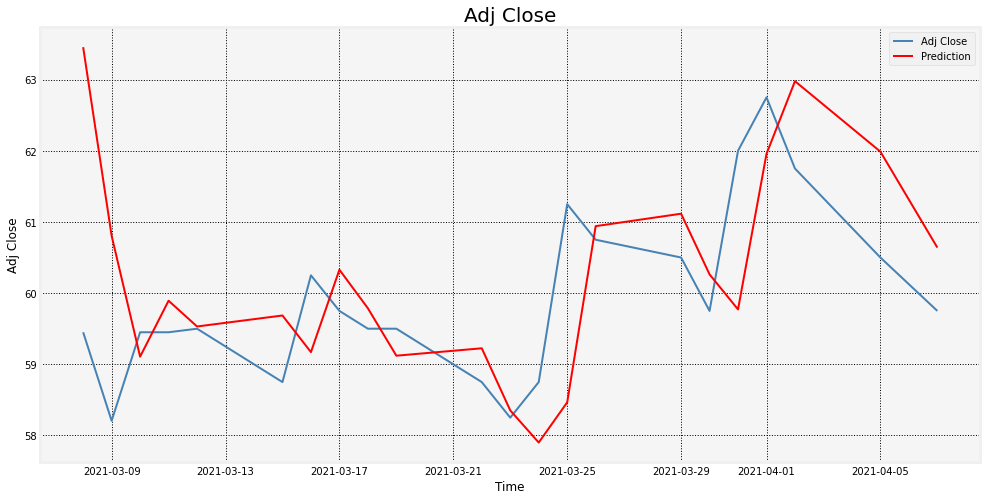

In [40]:
# Plot Data
plt.style.use('fivethirtyeight')
%matplotlib inline

plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.figsize'] = (15.0, 8) # set the size of figure
plt.subplot(facecolor = "whitesmoke") # set the background color
plt.plot(result['Adj Close'],label = 'Adj Close',color="steelblue", linestyle="-", linewidth=2.0) # plot with set the line width,shape and color
plt.plot(result['prediction'], label = 'Prediction', color="Red", linewidth=2.0)
plt.legend()

plt.xlabel("Time")
plt.ylabel("Adj Close")
plt.title("Adj Close", fontsize = 20)
plt.grid(color="k", linestyle=":") # set grid and line shape

# plt.savefig('Daily cases.png')
plt.show()

In [41]:
# Evaluation
percent_error = abs((result['Adj Close'] - result['prediction']) / result['Adj Close'])*100
result['percent_error'] = np.array(percent_error.values)
print(result)

MAPE = percent_error.mean()
print('MAPE: %f' % MAPE)
accuracy = 100 - MAPE
print('Accuracy:', round(accuracy, 2), '%.')

forecast_error = result["Adj Close"]-result['prediction']

max_percent_error = percent_error.max()
print('Max percent error: ', round(max_percent_error,2))

uncertainty = round(forecast_error.max(),2)
print('Uncertainty: ', uncertainty)

mean_absolute_error = abs(forecast_error).mean()
print('MAE: %f' % mean_absolute_error)

mse = (sum((result["Adj Close"]-result['prediction'])**2))/len(result)
print('MSE: %f' % mse)

root_mean_squared_error = sqrt(mse)
print('RMSE: %f' % root_mean_squared_error)

r2 = r2_score(result["Adj Close"], result['prediction'])
print('R squared:', r2)


            Adj Close  prediction  percent_error
Date                                            
2021-03-08  59.450001   63.455173       6.737044
2021-03-09  58.206276   60.805008       4.464694
2021-03-10  59.450001   59.107113       0.576767
2021-03-11  59.450001   59.893200       0.745499
2021-03-12  59.500000   59.531105       0.052277
2021-03-15  58.750000   59.685406       1.592180
2021-03-16  60.250000   59.170956       1.790945
2021-03-17  59.750000   60.328560       0.968301
2021-03-18  59.500000   59.786770       0.481966
2021-03-19  59.500000   59.120777       0.637349
2021-03-22  58.750000   59.224792       0.808157
2021-03-23  58.250000   58.351990       0.175090
2021-03-24  58.750000   57.900673       1.445663
2021-03-25  61.250000   58.465317       4.546422
2021-03-26  60.750000   60.940651       0.313829
2021-03-29  60.500000   61.115543       1.017427
2021-03-30  59.750000   60.263115       0.858770
2021-03-31  62.000000   59.770992       3.595174
2021-04-01  62.75000

In [ ]:
# remove outliner

# out_r = result.copy()
# out_r = out_r[out_r['percent_error']!=percent_error.max()]


# MAPE = out_r['percent_error'].mean()
# print('MAPE: %f' % MAPE)
# accuracy = 100 - MAPE
# print('Accuracy:', round(accuracy, 2), '%.')

# forecast_error = out_r["Adj Close"]-out_r['prediction']
# out_r['forecast_error'] = forecast_error
# print(out_r)

# max_percent_error = out_r['percent_error'].max()
# print('Max percent error: ', round(max_percent_error,2))

# uncertainty = round(forecast_error.max(),2)
# print('Uncertainty: ', uncertainty)

# mean_absolute_error = abs(forecast_error).mean()
# print('MAE: %f' % mean_absolute_error)

# mse = (sum((out_r["Adj Close"]-out_r['prediction'])**2))/len(result)
# print('MSE: %f' % mse)

# root_mean_squared_error = sqrt(mse)
# print('RMSE: %f' % root_mean_squared_error)

# r2 = r2_score(out_r["Adj Close"], out_r['prediction'])
# print('R squared:', r2)

## Prediction on Future Value (Tomorrow Price)


In [42]:
# Load test
tomorrow_date = "2021-04-08"
df = pd.DataFrame(0,columns=["Adj Close"],index=pd.date_range(tomorrow_date, periods=1))
df.index.name='Date'
ea_test_future_clean = df
ea_test_future_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1 entries, 2021-04-08 to 2021-04-08
Freq: D
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Adj Close  1 non-null      int64
dtypes: int64(1)
memory usage: 16.0 bytes


In [53]:
ea_total = pd.concat((ea_clean,ea_test_clean),axis=0)
inputs = ea_total[len(ea_total)-len(ea_test_future_clean)-60:].values # inputs start 60 days before validation set start
inputs = inputs.reshape(-1,1)
inputs = norm.fit_transform(inputs)

x_test = []
for i in range(60,60+len(ea_test_future_clean)):
  x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

# Make prediction
prediction = model.predict(x_test)

# Inverse normalization
prediction = norm.inverse_transform(prediction)

prediction = pd.DataFrame(prediction)
prediction.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1 non-null      float32
dtypes: float32(1)
memory usage: 132.0 bytes


In [54]:
forecast = ea_test_future_clean.copy()
forecast['Adj Close'] = prediction.values
print(forecast)

            Adj Close
Date                 
2021-04-08  61.201393
